# Tugas 2 Visi Komputer 

<p> Bayangkan anda bekerja sebagai anggota dari CSI (Crime Scene Investigation). Anda bekerja sebagai ahli cyber forensic. Kali ini, anda mendapat pekerjaan untuk mengidentifikasikan gambar tato seorang kriminal yang didapat dari CCTV. Namun identitas orang tersebut belum dapat diketahui. Anda memiliki data gambar-gambar orang tersangka, ada yang memiliki tato dan ada juga yang tidak memiliki tato. Jadi tugas anda di sini, ialah mengidentifikasikan siapakah kriminal yang dimaksud berdasarkan data gambar-gambar yang dimiliki.
</p>

##### Panduan:
<ul>
<li>Data gambar boleh disimpan di dalam folder, atau di dalam basis data</li>
<li>Simpan image descriptor untuk semua file gambar</li>
<li>Baca semua data gambar dan temukan padanan antara descriptor dari image query dan descriptor dari semua gambar</li>
</ul>


<p> Gambar-gambar tato bisa diambil dari website kaggle.com atau website lainnya yang memiliki dataset gambar tato.

</p>
<p>
Sertakan link google drive untuk mendownload gambar-gambar yang anda gunakan.
</p>



<p>👮MEMBER OF CSI (Crime Scene Investigation) </p>

<ul>
<li>Abdul Hafidh</li>
<li>2008107010056</li>
</ul>


<p> Berikut ini adalah link gdrive nya:   https://drive.google.com/drive/folders/13DMf2rv3i03cfaob9jZoZnddTvGcZ_3w?usp=sharing  </p>





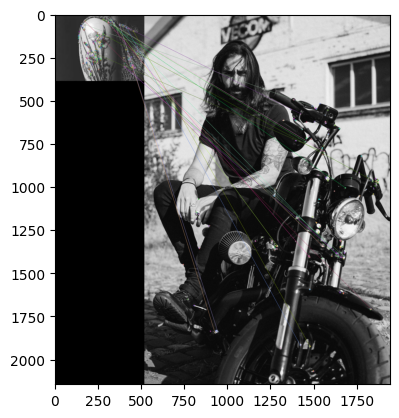

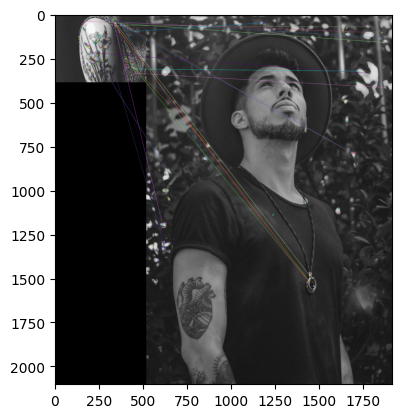

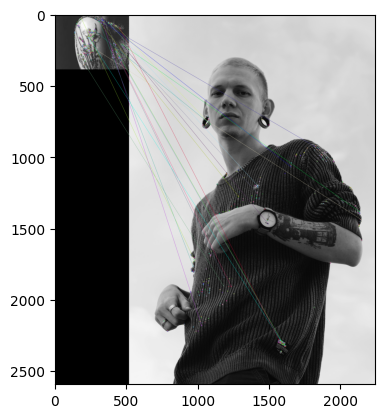

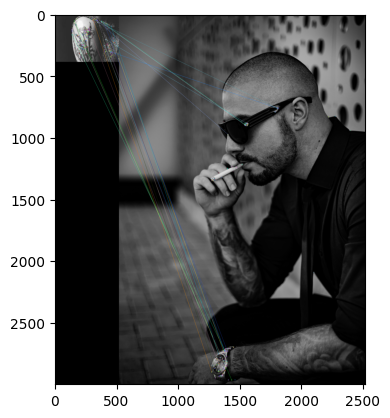

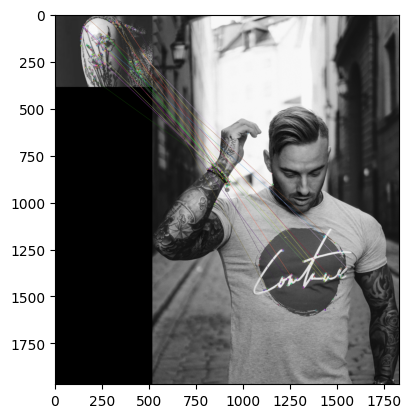

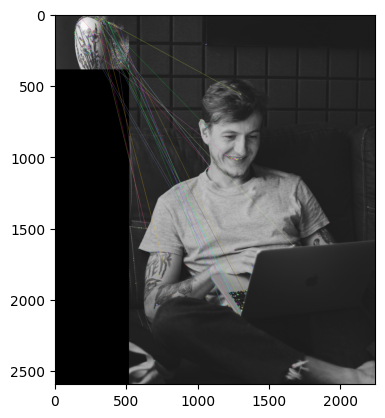

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
# Membaca Query Descriptor citra
query = cv2.imread("tersangka/tattoo.jpeg")

# Memmperbesar citra tatto query tanpa mengubah ukuran aslinya
query = cv2.resize(query, (0,0), fx=2, fy=2)



directory = "tersangka"

for filename in os.listdir(directory):
    if (os.path.join(directory, filename) == "tersangka/tattoo.jpeg"): # Jangan tampilkan objek descriptor query
        continue
    train_image = cv2.imread(os.path.join(directory, filename))

    # Mengecilkan sedikit ukuran citra train
    train_image = cv2.resize(train_image, (0,0), fx=0.5, fy=0.5)

    # Mengkonversi citra ke bentuk grayscale
    query_gray = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    train_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi dengan menggunkaan algoritma orb detector
    orb = cv2.ORB_create()

    # Mencari keypoint dan descriptor
    query_keypoints, query_descriptors = orb.detectAndCompute(query_gray, None)
    train_keypoints, train_descriptors = orb.detectAndCompute(train_gray, None)

    # Mencocokan keypoints
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(query_descriptors, train_descriptors)

   # Draw the keypoint matches on the output image
    output_img = cv2.drawMatches(query_gray, query_keypoints,train_gray, train_keypoints, matches[:20],None) 


    # Save the final image 
    output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    plt.imshow(output_img),plt.show()


